## Using pyvoronoi directly

In [1]:
import pandas as pd
import re
import numpy as np
import cv2
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [2]:
df = pd.DataFrame()

In [3]:
# Using readline() 
file1 = open('simplez80-mobo.kicad_pcb', 'r') 
count = 0
line = file1.readline()
bad_chars = [';', ':', '!', "*"] 

while line: 
    line = file1.readline() 
  
    if "segment" in line:
        line = line.rstrip()
        line = re.sub("\)", "", line)
        #print(line)
        parse = line.split("(")
        
        for i in parse:
            if i.startswith("start"):
                coords = i.split(" ")
                startx=float(coords[1])
                starty=float(coords[2])
                
            if i.startswith("end"):
                coords = i.split(" ")
                endx=float(coords[1])
                endy=float(coords[2])
                
            if i.startswith("width"):
                coords = i.split(" ")
                width=float(coords[1])
                
            if i.startswith("layer"):
                coords = i.split(" ")
                pdrow = pd.DataFrame({"startx":startx,"starty":starty,"endx":endx,"endy":endy,"width":width,"layer":coords[1]}, index=[0]) 
                df = df.append(pdrow)
  
file1.close() 

In [4]:
pxmm = 30 ### 300DPI = 12pixels per mm

boardminx = min(min(df.startx),min(df.endx))-10
boardmaxx = max(max(df.startx),max(df.endx))+10

boardminy = min(min(df.starty),min(df.endy))-10
boardmaxy = max(max(df.starty),max(df.endy))+10

brd_width = int((boardmaxx-boardminx) * pxmm)
brd_height = int((boardmaxy-boardminy) * pxmm) 

print("Board:", brd_width,"x",brd_height, "pixels")

Board: 2777 x 3356 pixels


In [5]:
df['dsx'] = ((df.startx-boardminx)*pxmm).astype('int32', copy=False)
df['dex'] = ((df.endx-boardminx)*pxmm).astype('int32', copy=False)
df['dsy'] = ((df.starty-boardminy)*pxmm).astype('int32', copy=False)
df['dey'] = ((df.endy-boardminy)*pxmm).astype('int32', copy=False)
df['dwi'] = (df.width*pxmm).astype('int32', copy=False)

In [6]:
df

,startx,starty,endx,endy,width,layer,dsx,dex,dsy,dey,dwi
0,160.020000,154.940000,158.844999,156.115001,0.75,B.Cu,1917,1881,2986,3021,22
0,130.139999,155.539999,129.540000,154.940000,0.75,B.Cu,1020,1002,3004,2986,22
0,130.715001,156.115001,130.139999,155.539999,0.75,B.Cu,1038,1020,3021,3004,22
0,143.604999,156.115001,130.715001,156.115001,0.75,B.Cu,1424,1038,3021,3021,22
0,144.780000,154.940000,143.604999,156.115001,0.75,B.Cu,1459,1424,2986,3021,22
0,115.475001,156.115001,114.899999,155.539999,0.75,B.Cu,580,563,3021,3004,22
0,114.899999,155.539999,114.300000,154.940000,0.75,B.Cu,563,545,3004,2986,22
0,128.364999,156.115001,115.475001,156.115001,0.75,B.Cu,967,580,3021,3021,22
0,129.540000,154.940000,128.364999,156.115001,0.75,B.Cu,1002,967,2986,3021,22
0,174.005000,156.115001,175.260000,154.860001,0.75,B.Cu,2336,2374,3021,2983,22


In [7]:
import pyvoronoi

In [8]:
pv = pyvoronoi.Pyvoronoi(100)

Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' ob

Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' ob

Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' ob

Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' ob

Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' ob

Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' ob

Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' ob

Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' ob

Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' ob

Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' ob

Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' ob

Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' ob

Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' object is not subscriptable
Exception ignored in: 'pyvoronoi.Pyvoronoi._to_voronoi_segment'
TypeError: 'NoneType' ob

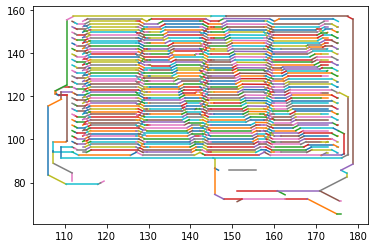

In [9]:
t=0
for index,row in df.iterrows():
    pv.AddSegment(pv.AddSegment([[row['startx'],row['starty']],[row['endx'],row['endy']]]))
    plt.plot((row['startx'],row['endx']),(row['starty'],row['endy']))
    t=t+1
    
plt.show()

In [10]:
pv.Construct()


In [11]:
edges = pv.GetEdges()
vertices = pv.GetVertices()
cells = pv.GetCells()

In [12]:
print("Cell Count: {0}".format(len(cells)))

Cell Count: 3065


AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xlim'

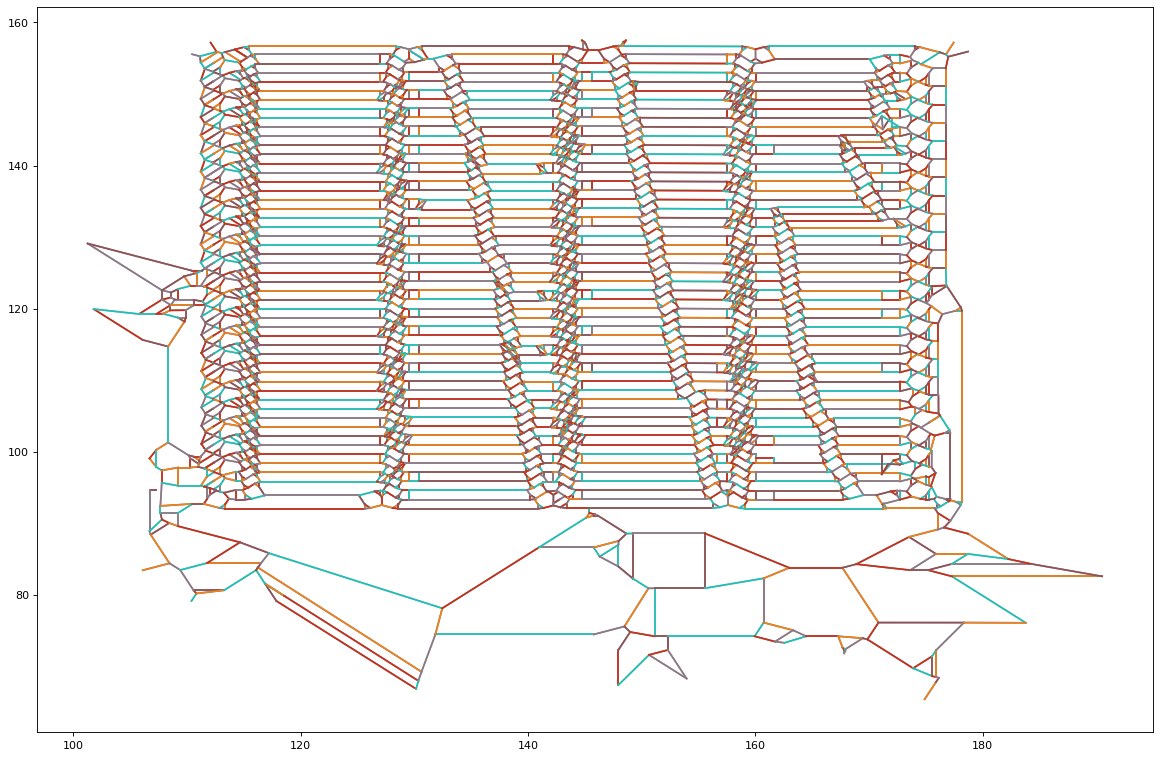

In [20]:
figure(num=None, figsize=(18, 12), dpi=80, facecolor='w', edgecolor='k')
for e in edges:
    v1 = e.start
    v2 = e.end
    
    (x1,y1)=(vertices[v1].X,vertices[v1].Y)
    (x2,y2)=(vertices[v2].X,vertices[v2].Y)
    
    if (x1>100) and (x2>100) and (x1<200) and (x2<200) and (y1>60) and (y2>60) and (y1<160) and (y2<160):

        plt.plot((x1,x2),(y1,y2))
plt.set_xlim(100,180)
plt.set_ylim(60,160)

plt.show()